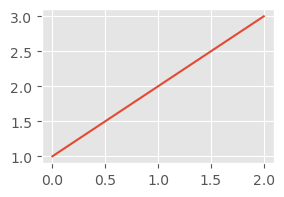

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
pd.Series([1,2,3]).plot(figsize=(3,2));

## 데이터 준비

* 속성 정보
    * `datetime` - 시간대별 데이터 제공. timestamp(날짜와 시간 결합) 형태
    * `season`  - 1 = spring, 2 = summer, 3 = fall, 4 = winter
    * `holiday` - 공휴일(주말이 아닌 빨간날). 1-yes, 2-no
    * `workingday` - 주말, 공휴일을 제외한 날 1-yes, 2-no
    * `weather`
        * 1: Clear, Few clouds, Partly cloudy, Partly cloudy
        * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
        * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
        * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
    * `temp` - 섭씨온도
    * `atemp` - 섭씨체감온도
    * `humidity` - 상대습도
    * `windspeed` - 풍속
    * `casual` - 비회원 대여량
    * `registered` - 회원 대여량
    * `count` - 총 대여량

In [4]:
# 데이터 불러오기
file_path = 'data/bike_sharing_demand.csv'
df = pd.read_csv(file_path, parse_dates=['datetime'])
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [5]:
# 데이터 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


# 파생컬럼 추가

In [6]:
# 연, 월, 일, 시, 요일
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['dayofweek'] = df['datetime'].dt.dayofweek # 월요일:0, 일요일:6
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,5


# 데이터 탐색(EDA)
* 데이터의 품질 확인(값의 분포, 결측치, 이상치 등)
* 독립변수와 종속변수간의 관계를 중점적으로 탐색

## datetime

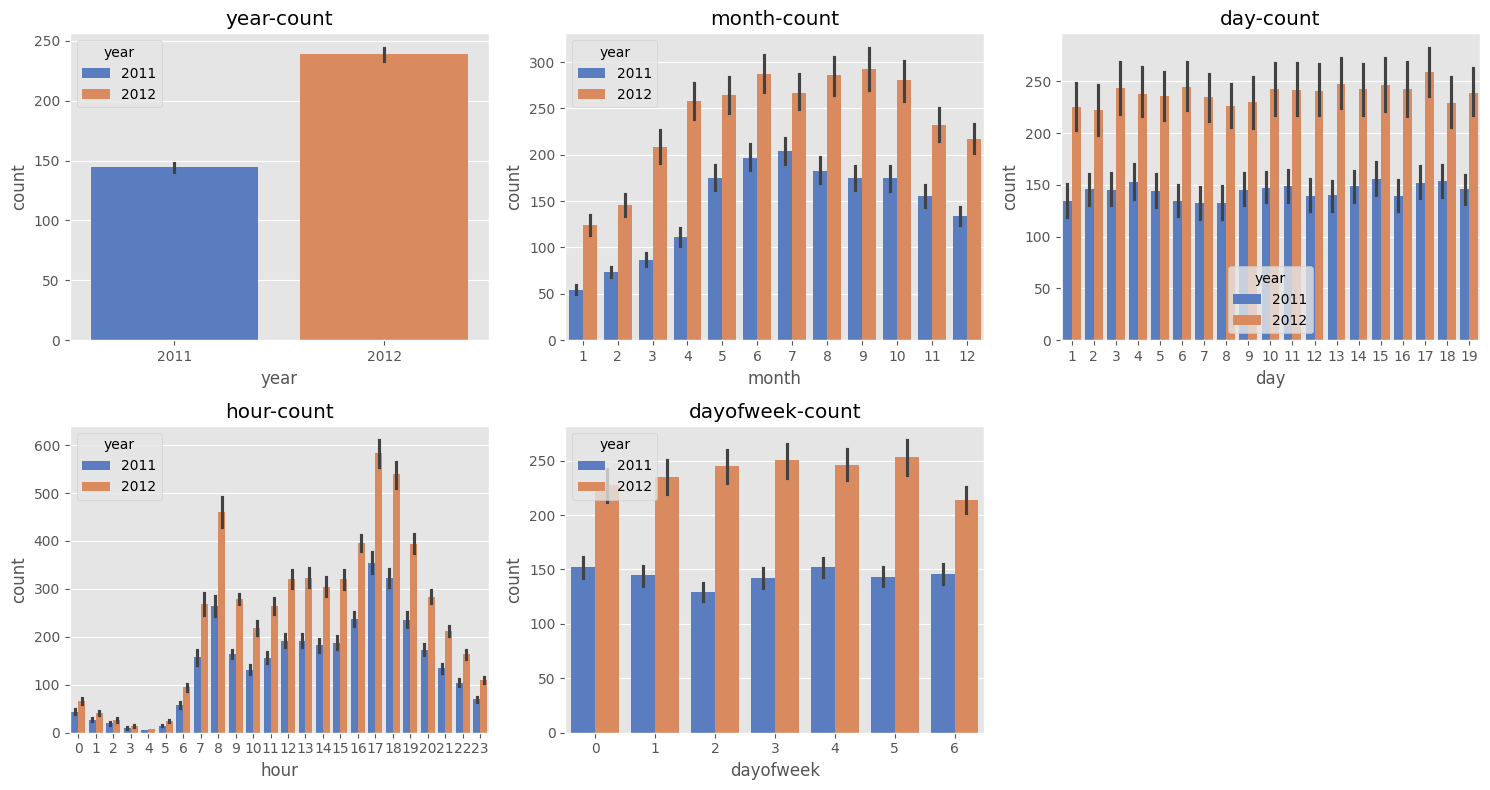

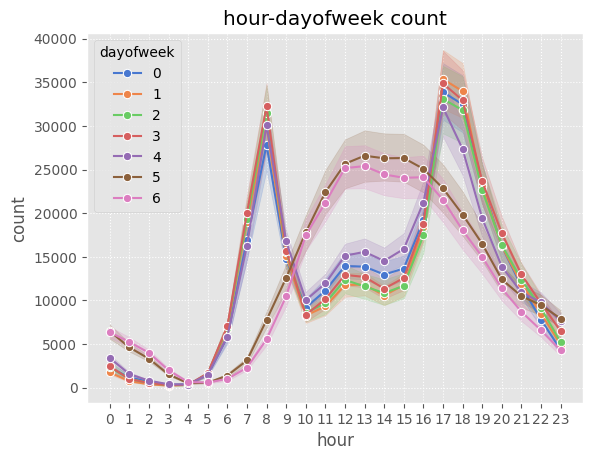

In [ ]:
# 시간대 - 요일 별 대여량


## season
* 1 - 1,2,3월
* 2 - 4,5,6월
* 3 - 7,8,9월
* 4 - 10,11,12월

,month,season
0,1,1
431,2,1
877,3,1
1323,4,2
1778,5,2
2234,6,2
2690,7,3
3146,8,3
3602,9,3
4055,10,4


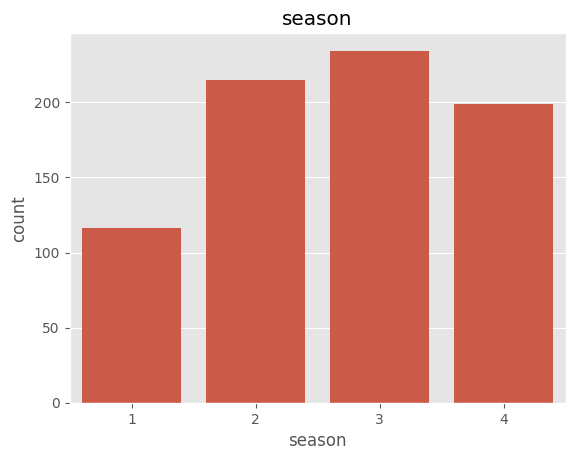

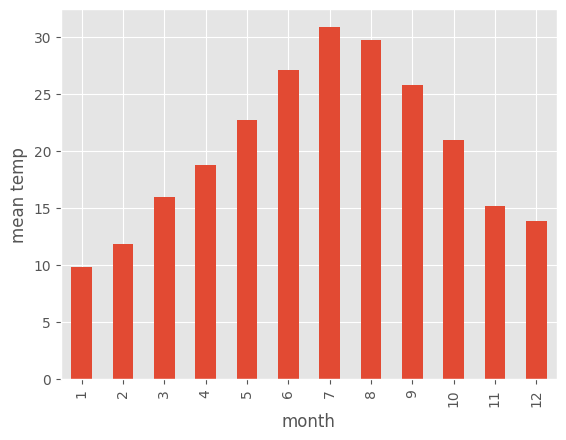

In [ ]:
# 월별 평균 기온


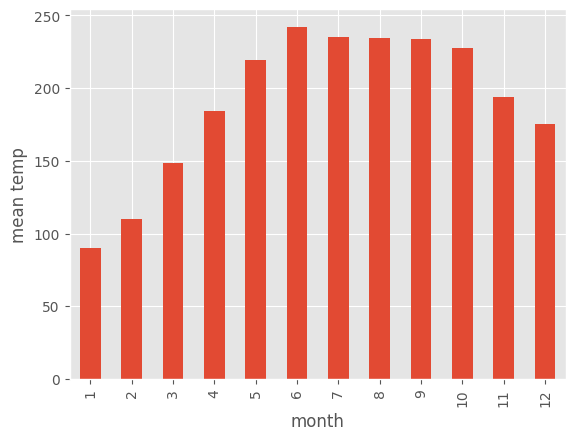

In [ ]:
# 월별 평균 대여량


## holiday
* 공휴일(평일 중 빨간날)
* 토,일은 원래 쉬는 날로, holiday로 간주하지 않음
* 공휴일과 비공휴일의 날짜수의 차이가 있으므로, 평균 대여량으로 비교한다.

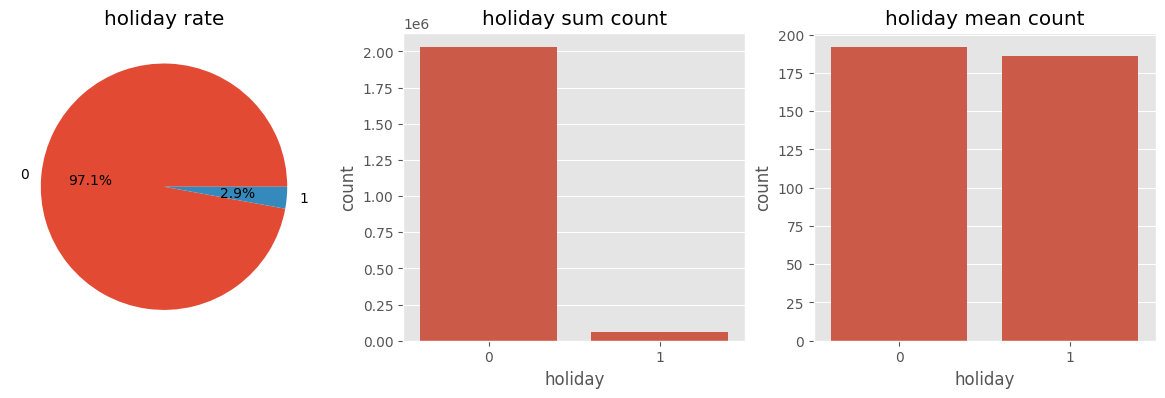

## workingday
* 평일 중 holiday를 제외한 날이 workingday
* workingday와 workingday의 날짜수의 차이가 있으므로, 평균 대여량으로 비교한다.

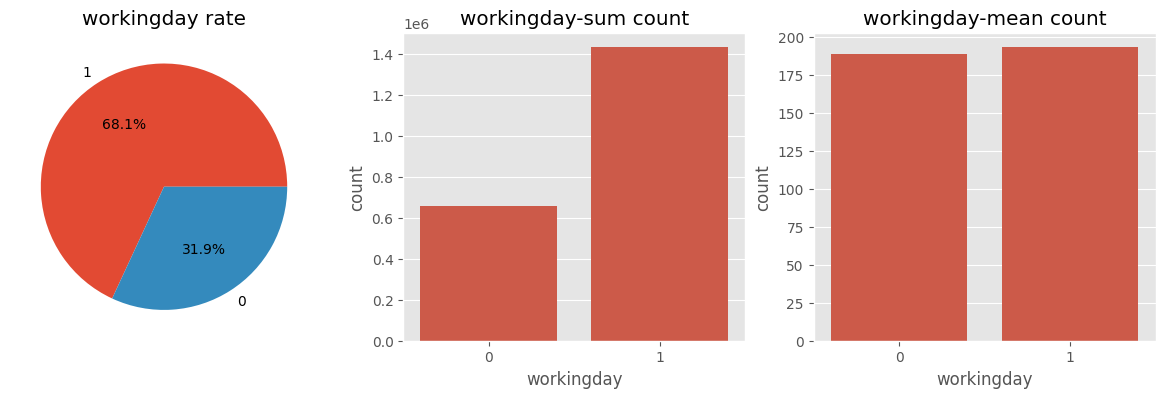

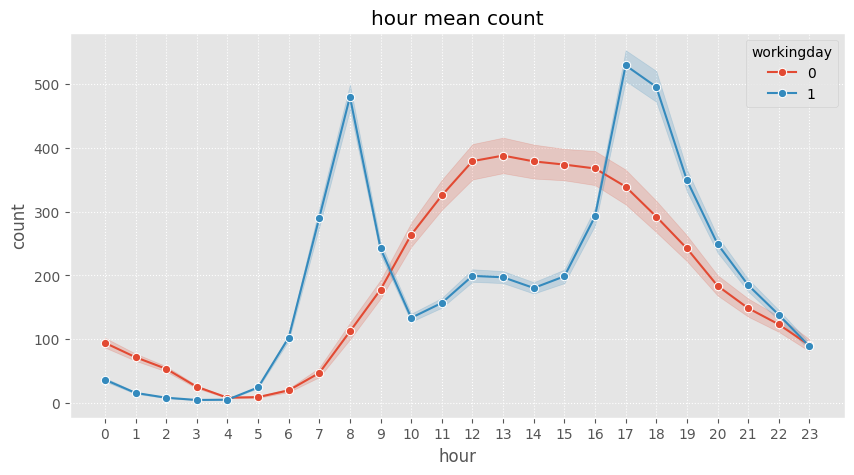

## weather
* 1: Clear, Few clouds, Partly cloudy, Partly cloudy
* 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mis
* 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clou
* 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow +    Fog
* weather가 4인 날은 단 하루밖에 없었음

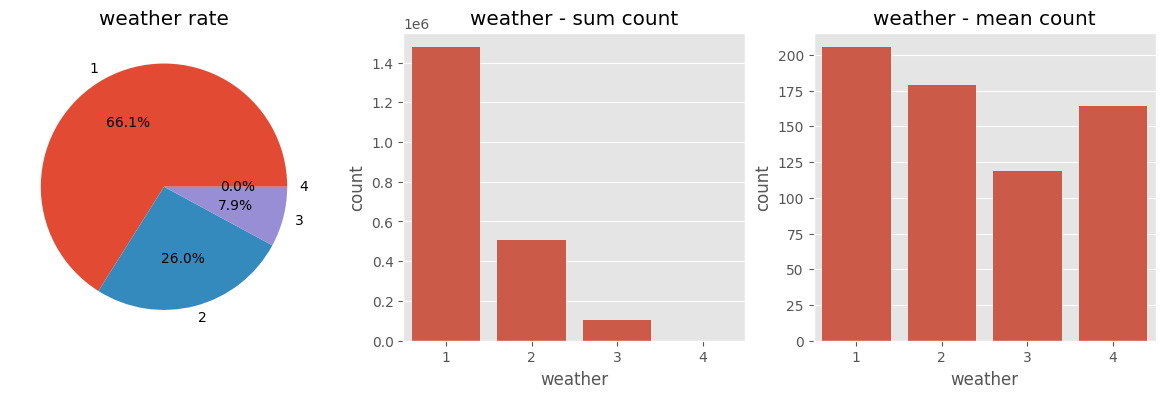

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

## temp

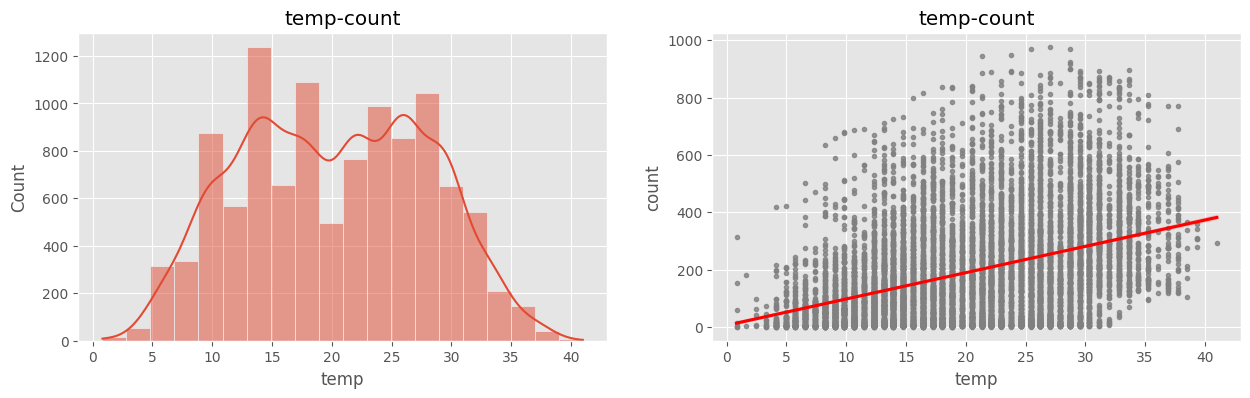

## atemp

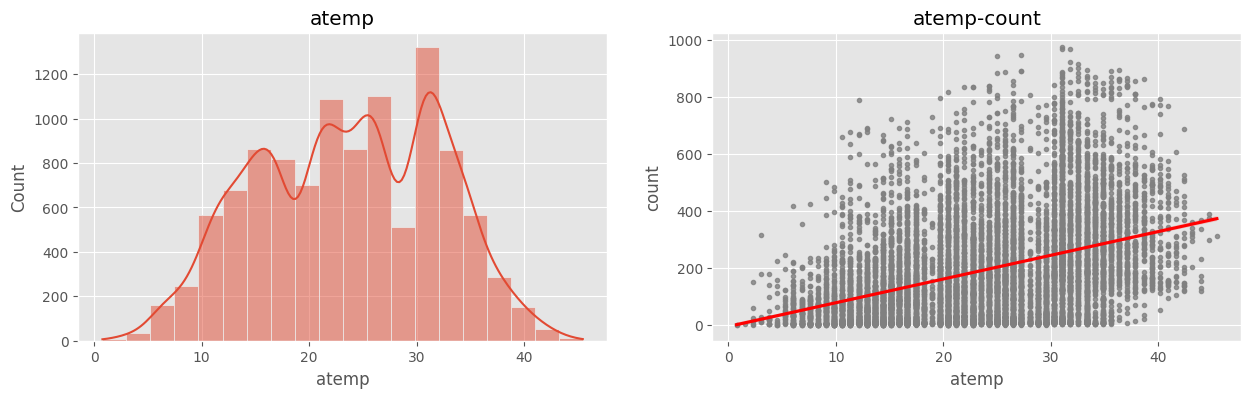

## humidity


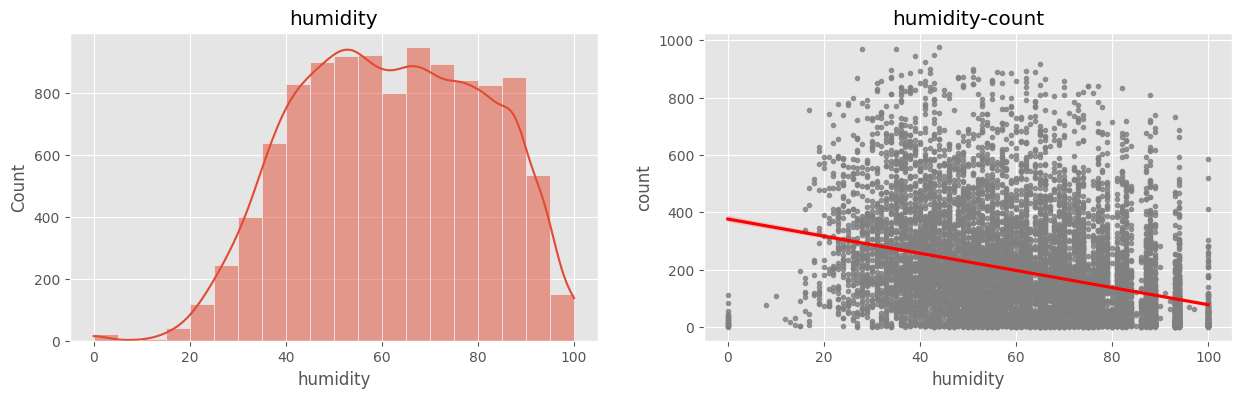

## windspeed
* value가 0인 데이터가 10% 이상
    * 풍속이 0인 경우는 없다고 보고, 해당 값은 결측이라고 본다.
* windspeed의 값이 0인 데이터들은 결측치가 0으로 채워진 상태인 것으로 파악
* feature engineering 필요

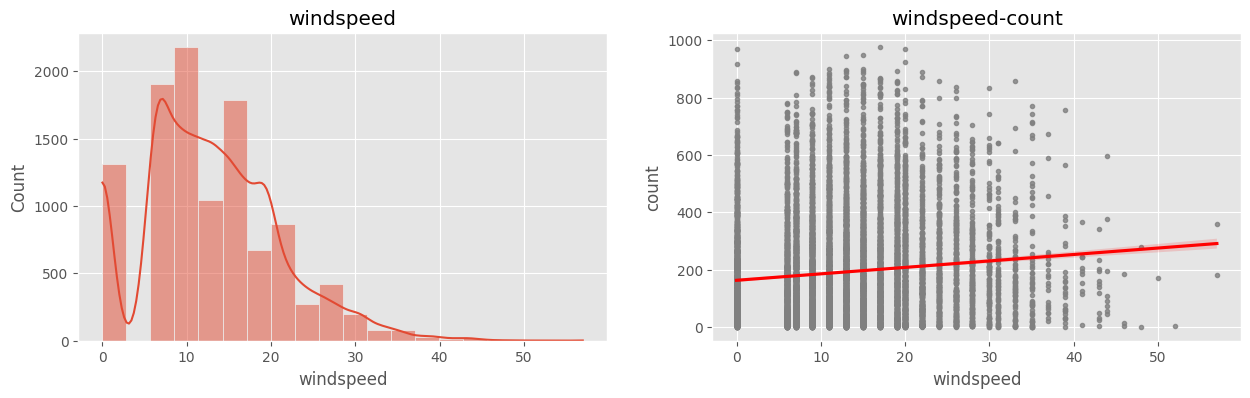

## casual, registered, count

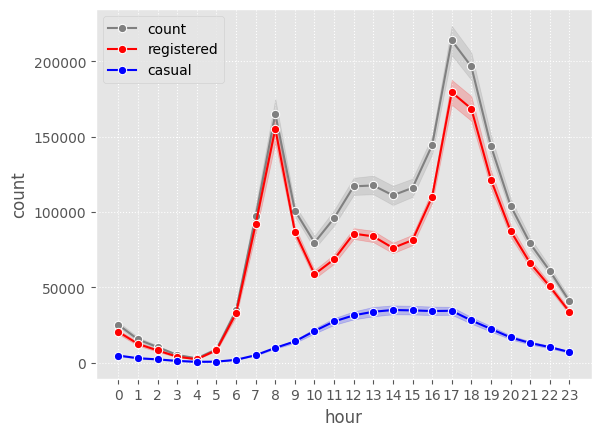

## 상관계수
* 피어슨 상관계수
    * 두 변수 간의 선형 관계의 강도와 방향을 측정.
    * 파이썬에서 corr()함수를 이용하여 구할 수 있음.
    * +1과 -1 사이의 값을 가진다.
        * +1 : 완벽한 양의 선형 상관 관계
        * -1 : 완벽한 음의 상관관계
        * 0 : 선형 상관 관계 없음,
    
* 다중공선성
    * 독립변수 간 강한 상관관계가 있는 경우
    * 둘중 하나의 변수만 사용

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int32         
 13  month       10886 non-null  int32         
 14  day         10886 non-null  int32         
 15  hour        10886 non-null  int32         
 16  dayofweek   10886 non-

<Axes: >

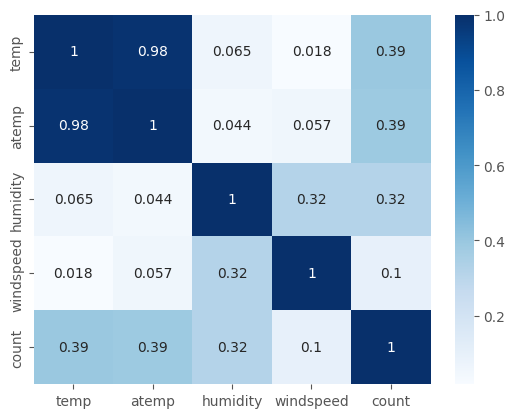